In [1]:
# !pip install yfinance

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime

# To import the dataset (yfinance is a Python library that provides access to Yahoo Finance's financial data)
import yfinance as yf

# To suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
stock_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'META']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in stock_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
company_list = [AAPL, GOOG, MSFT, AMZN, META]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "META"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.sample(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-03-25,178.009995,180.990005,177.240005,179.710007,179.710007,29815500,AMAZON
2023-12-07,146.149994,147.919998,145.339996,146.880005,146.880005,52352800,AMAZON
2023-11-29,190.899994,192.089996,188.970001,189.369995,188.872482,43014200,APPLE
2023-10-30,333.410004,339.450012,331.829987,337.309998,335.400421,22828100,MICROSOFT
2023-09-21,132.389999,133.190002,131.089996,131.360001,131.210693,22042700,GOOGLE
2023-08-18,131.619995,134.070007,131.149994,133.220001,133.220001,48469400,AMAZON
2024-03-18,414.250000,420.730011,413.779999,417.320007,416.568634,20106000,MICROSOFT
2024-01-17,142.910004,143.410004,140.509995,142.889999,142.727585,17884500,GOOGLE
2023-10-05,136.130005,136.500000,134.455002,135.990005,135.835434,15922900,GOOGLE


In [7]:
df.shape # Shape of the dataset

(1250, 7)

In [8]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name'], dtype='object')

#### About the columns
- **Open**: The price of a financial asset at the beginning of a trading period.

- **High**: The highest price reached by a financial asset during a trading period.

- **Low**: The lowest price reached by a financial asset during a trading period.

- **Close**: The final price of a financial asset at the end of a trading period.

- **Adj Close (Adjusted Close)**: Adjusted closing price refers to the price of the stock after paying off the dividends.

- **Volume**: Volume refers to the total number of shares that have been bought or sold during a trading period.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1250 entries, 2023-07-10 to 2024-07-05
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1250 non-null   float64
 1   High          1250 non-null   float64
 2   Low           1250 non-null   float64
 3   Close         1250 non-null   float64
 4   Adj Close     1250 non-null   float64
 5   Volume        1250 non-null   int64  
 6   company_name  1250 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.1+ KB


In [10]:
df.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,1250.00,1250.00,1250.00,1250.00,1250.00,1.250000e+03
mean,251.97,254.56,249.49,252.19,251.70,3.423078e+07
std,118.91,120.23,117.61,119.08,118.80,2.276167e+07
min,116.76,118.22,115.83,116.87,116.74,5.467500e+06
25%,153.58,155.06,152.75,153.80,153.77,1.774600e+07
50%,187.01,188.33,185.35,186.89,186.89,2.630715e+07
75%,343.74,346.97,339.49,344.29,342.10,4.678395e+07
max,529.28,540.87,518.89,539.91,539.91,2.464214e+08


In [11]:
# Chccking for null values
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [12]:
# Checking for duplicate
df.duplicated().any()

False

# EDA

In [13]:
group = df.groupby('company_name').describe()['Adj Close']
group.round(2)

,count,mean,std,min,25%,50%,75%,max
company_name,,,,,,,,
AMAZON,250.0,157.22,22.09,119.57,137.36,153.40,178.97,200.00
APPLE,250.0,184.12,11.79,164.78,174.80,183.27,191.05,226.34
GOOGLE,250.0,145.96,17.37,116.74,133.49,139.90,155.79,191.96
META,250.0,392.35,85.10,282.67,311.93,356.90,482.59,539.91
MICROSOFT,250.0,378.83,41.96,310.37,333.84,377.35,413.81,467.56


#### - META and MICROSOFT have the highest average adjusted closing prices, but META is the most volatile with the highest standard deviation and the widest price range.
#### - APPLE has the most stable prices with the lowest standard deviation, making it potentially less risky for investors who prioritize stability.
#### - GOOGLE has the lowest average prices and also a relatively low standard deviation, indicating lower prices but not high volatility.
#### - AMAZON and GOOGLE have lower average prices compared to META and MICROSOFT, but AMAZON has slightly higher volatility than GOOGLE.

## Company-wise Analysis

In [14]:
# Let's see a historical view of the closing price
def plot(company, company_name):
    
    plt.plot(company['Adj Close'])
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.xticks(rotation = 20)
    plt.title(f"Closing Price of {company_name}")

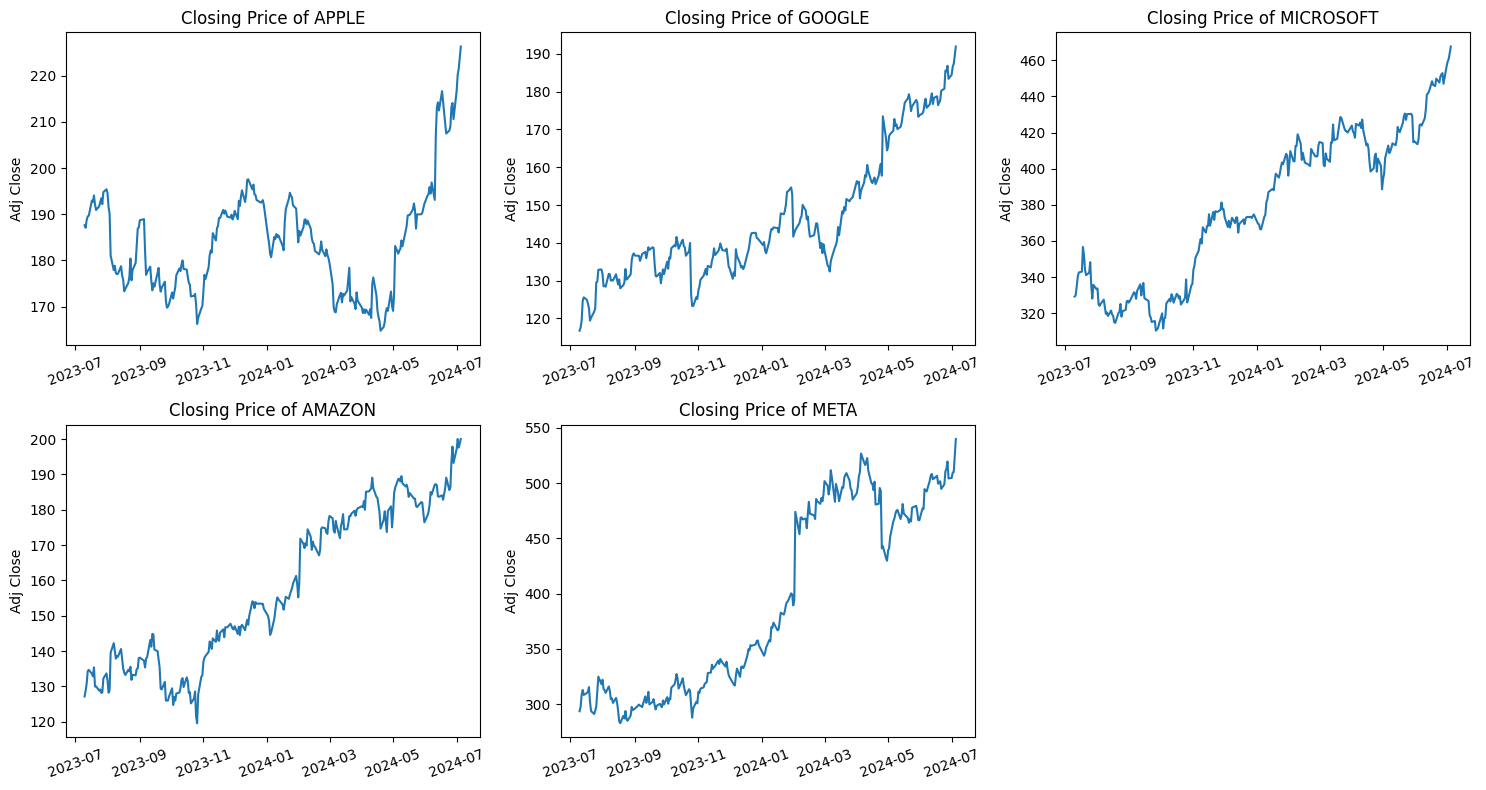

In [15]:
plt.figure(figsize=(15, 8))

plt.subplot(2,3,1)
plot(AAPL, "APPLE")

plt.subplot(2,3,2)
plot(GOOG, "GOOGLE")

plt.subplot(2,3,3)
plot(MSFT, "MICROSOFT")

plt.subplot(2,3,4)
plot(AMZN, "AMAZON")

plt.subplot(2,3,5)
plot(META, "META")

plt.tight_layout()
plt.show()

In [16]:
# Let's see a historical view of the closing price
def plot4(company, company_name):
    
    plt.boxplot([company['Open'], company['High'], company['Low'], company['Close'], company['Adj Close']], labels=['Open', 'High', 'Low', 'Close', 'Adj Close'])
    plt.ylabel('Amount')
    plt.title(f'Box Plot of each column for {company_name}')

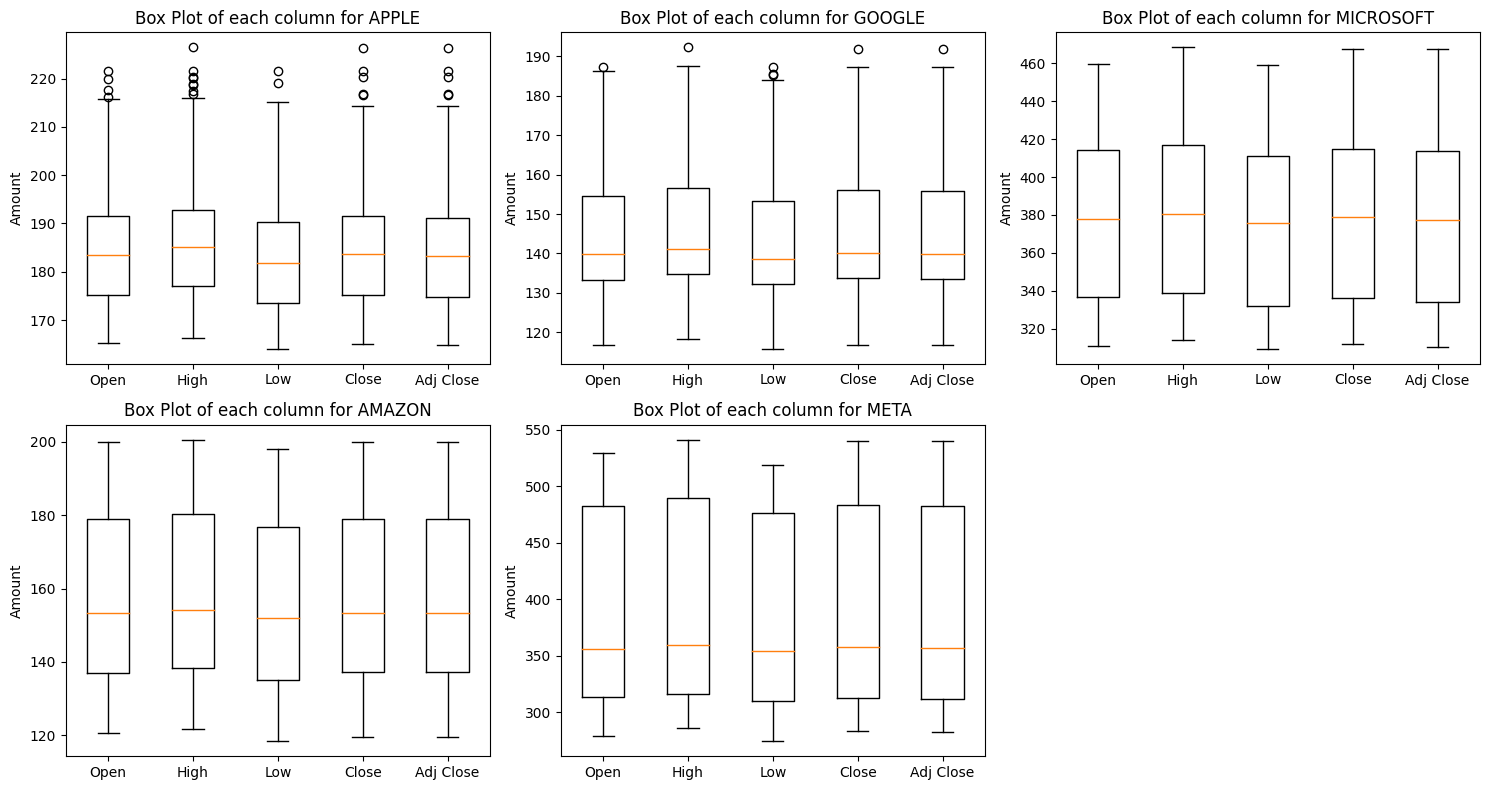

In [17]:
plt.figure(figsize=(15, 8))

plt.subplot(2,3,1)
plot4(AAPL, "APPLE")

plt.subplot(2,3,2)
plot4(GOOG, "GOOGLE")

plt.subplot(2,3,3)
plot4(MSFT, "MICROSOFT")

plt.subplot(2,3,4)
plot4(AMZN, "AMAZON")

plt.subplot(2,3,5)
plot4(META, "META")

plt.tight_layout()
plt.show()

In [18]:
# New Feature - Daily Return
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change() # daily percentage change in the adjusted closing price

In [19]:
def plot3(company, company_name):
    
    company['Daily Return'].plot(legend=False, linestyle='--', marker='o')
    plt.ylabel('Daily Return')
    plt.xlabel('Date')
    plt.title(f"{company_name}", fontweight='bold')

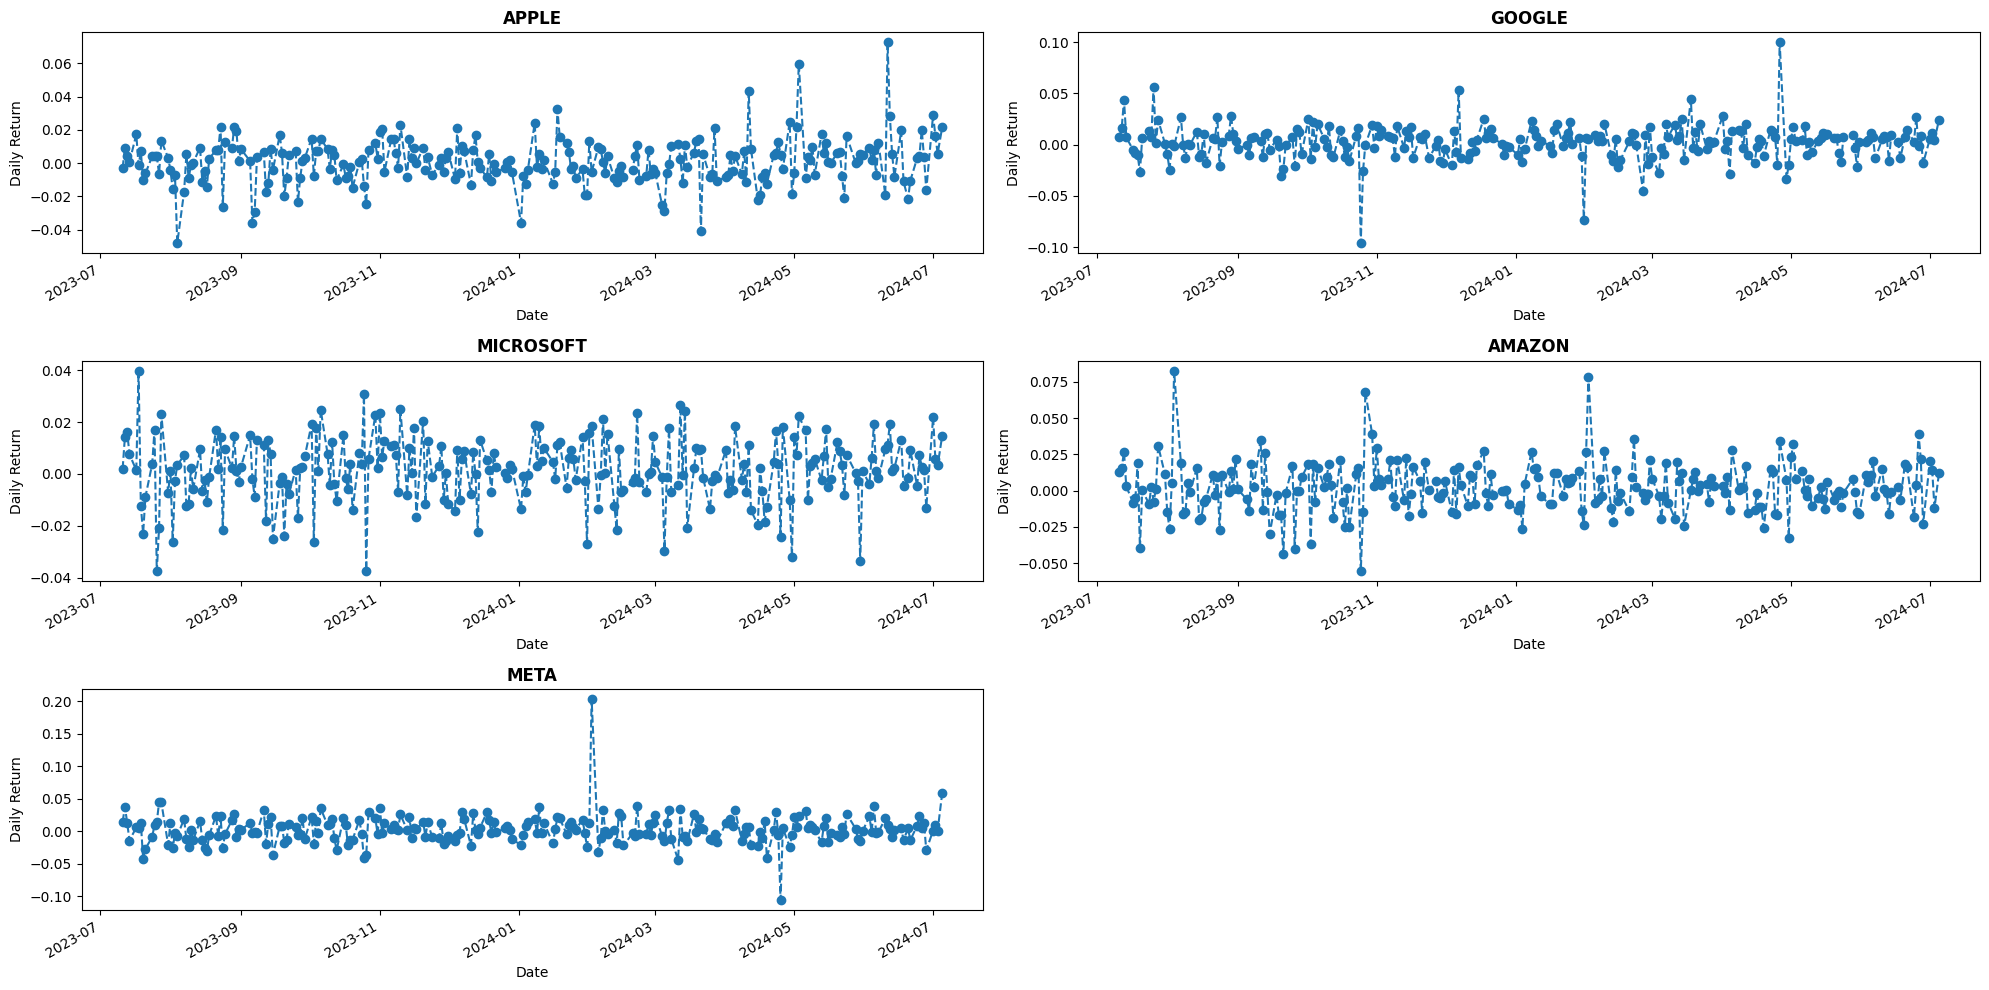

In [20]:
plt.figure(figsize=(20, 10))

plt.subplot(3,2,1)
plot3(AAPL, "APPLE")

plt.subplot(3,2,2)
plot3(GOOG, "GOOGLE")

company_list = [AAPL, GOOG, MSFT, AMZN, META]

plt.subplot(3,2,3)
plot3(MSFT, "MICROSOFT")

plt.subplot(3,2,4)
plot3(AMZN, "AMAZON")

plt.subplot(3,2,5)
plot3(META, "META")

plt.tight_layout()
plt.show()

In [21]:
def plot2(company, company_name):
    
    sns.histplot(company['Daily Return'], bins=50, kde=True)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f"{company_name}", fontweight='bold')

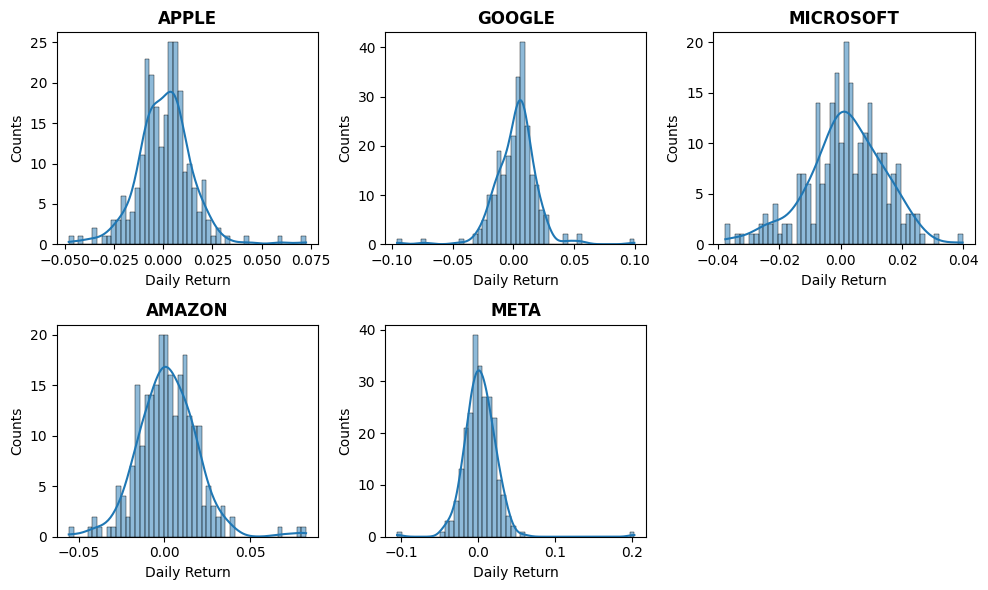

In [22]:
plt.figure(figsize=(10, 6))

plt.subplot(2,3,1)
plot2(AAPL, "APPLE")

plt.subplot(2,3,2)
plot2(GOOG, "GOOGLE")

company_list = [AAPL, GOOG, MSFT, AMZN, META]

plt.subplot(2,3,3)
plot2(MSFT, "MICROSOFT")

plt.subplot(2,3,4)
plot2(AMZN, "AMAZON")

plt.subplot(2,3,5)
plot2(META, "META")

plt.tight_layout()
plt.show()

#### - All five companies show daily returns that are centred around 0, indicating that on most days, the returns are close to zero.

#### - The distributions of daily returns for these stocks are approximately normal, with some skewness and kurtosis (tail heaviness) present.

#### - META and GOOGLE seem to have more extreme daily returns compared to APPLE, MICROSOFT, and AMAZON, indicating higher volatility.

#### - MICROSOFT's daily returns appear the most stable, with a narrower range of daily return values and fewer outliers.

In [23]:
# To find correlation matrix for each company
def corr_(company, company_name):
    cm = company.drop('company_name', axis = 1).corr()

    sns.heatmap(cm, annot=True)
    plt.title(f"{company_name}", fontweight='bold')
    plt.xticks(rotation = 25)

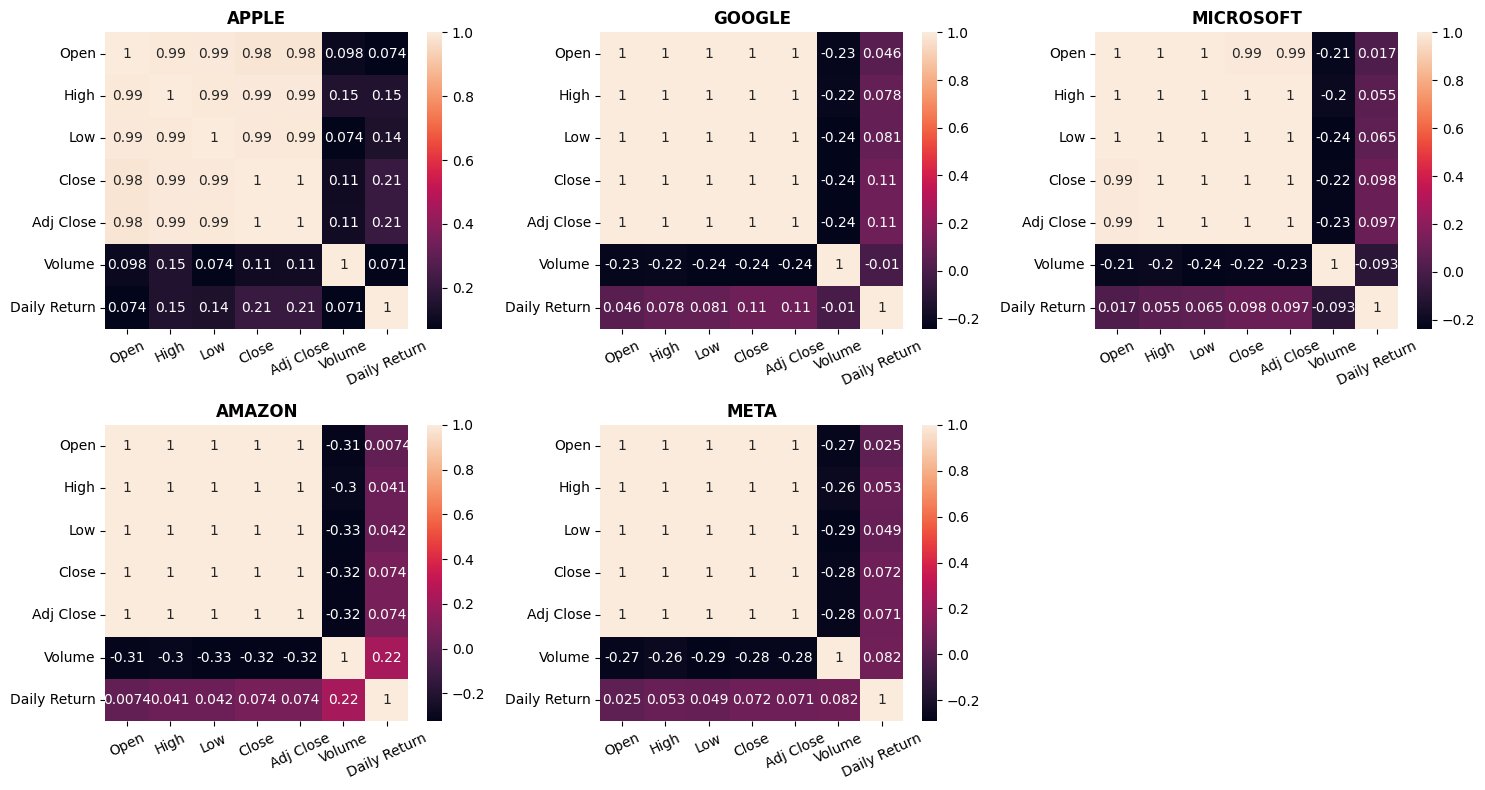

In [24]:
plt.figure(figsize=(15, 8))

plt.subplot(2,3,1)
corr_(AAPL, "APPLE")

plt.subplot(2,3,2)
corr_(GOOG, "GOOGLE")

plt.subplot(2,3,3)
corr_(MSFT, "MICROSOFT")

plt.subplot(2,3,4)
corr_(AMZN, "AMAZON")

plt.subplot(2,3,5)
corr_(META, "META")

plt.tight_layout()
plt.show()

#### - The price-related attributes (Open, High, Low, Close, Adj Close) are highly correlated for all companies, as expected.

#### - Volume generally shows a negative correlation with price attributes, indicating that higher trading volumes tend to coincide with lower prices.

#### - Daily Return has low correlations with other attributes, suggesting that day-to-day price changes are not strongly dependent on the absolute price levels or trading volumes.

In [25]:
# Make a new tech returns DataFrame
tech_rets = pd.DataFrame({'AALP' : AAPL['Daily Return'],  'GOOG': GOOG['Daily Return'], 'MSFT' : MSFT['Daily Return'], 'AMZN' : AMZN['Daily Return'], 'META' : META['Daily Return']})
tech_rets.head()

,AALP,GOOG,MSFT,AMZN,META
Date,,,,,
2023-07-10,NaN,NaN,NaN,NaN,NaN
2023-07-11,-0.002810,0.007187,0.001929,0.012979,0.014247
2023-07-12,0.008985,0.016226,0.014227,0.015686,0.037044
2023-07-13,0.004057,0.043555,0.016192,0.026758,0.013157
2023-07-14,0.000787,0.006969,0.007529,0.002829,-0.014486


In [26]:
closing_df = pd.DataFrame({'AALP' : AAPL['Adj Close'],  'GOOG': GOOG['Adj Close'], 'MSFT' : MSFT['Adj Close'], 'AMZN' : AMZN['Adj Close'], 'META' : META['Adj Close']})
closing_df.head()

,AALP,GOOG,MSFT,AMZN,META
Date,,,,,
2023-07-10,187.613632,116.737160,329.254333,127.129997,293.496887
2023-07-11,187.086441,117.576202,329.889374,128.779999,297.678314
2023-07-12,188.767502,119.484032,334.582703,130.800003,308.705627
2023-07-13,189.533417,124.688110,340.000275,134.300003,312.767303
2023-07-14,189.682648,125.557121,342.560242,134.679993,308.236572


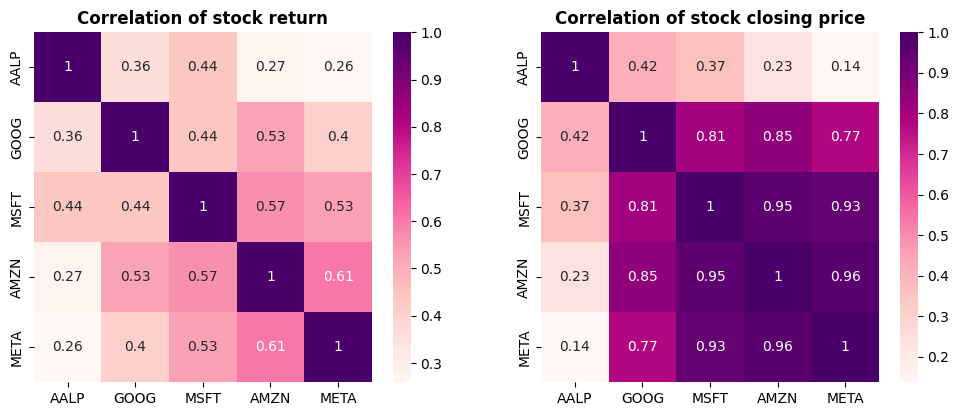

In [27]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='RdPu')
plt.title('Correlation of stock return', fontweight = 'bold')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='RdPu')
plt.title('Correlation of stock closing price', fontweight = 'bold')

plt.show()

#### Correlation is a statistical measure that shows how two or more stocks move in relation to one another. It can be important for investors to understand stock correlation because it can help them build a diversified and low-risk portfolio.